In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv ("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df = df.drop(["oldpeak", "slp", "thall"], axis = 1)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


Data Analysis

In [4]:
'''  
Age: Age of the patient
Sex: Sex of the patient (1 = male, 0 = female)
exng: exercise induced angina (1 = yes, 0 = no)
ca: number of major vessels (0-3)
cp: chest pain type chest pain type
    0: typical angina: chest pain related decrease blood supply to the heart
    1: atypical angina: chest pain not related to heart
    2: non-angina pain: typically esophageal spasms (non heart related)
    3: asymptomatic: chest pain not showing signs of disease
trtbps: resting blood pressure (in mm Hg on admission to hospital)
    anything above 130-140 is typically cause for concern
chol: cholestoral in mg/dl fetched via BMI sensor 
    above 200 is cause for concern
fbs: (fasting blood sugar > 120 mg/dl) (1 = true, 0 = false)
    '>126' mg/dL signals diabetes
rest_ecg: resting electrocardiographic results
    0: normal
    1: having ST-T wave abnormality (T wave inversions and/or ST elevation of depression of >0.05mV)
    2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach: maximum heart rate achieved 
target: 0 = less chance of heart attack; 1 = more chance of heart attack

'''

"  \nAge: Age of the patient\nSex: Sex of the patient (1 = male, 0 = female)\nexng: exercise induced angina (1 = yes, 0 = no)\nca: number of major vessels (0-3)\ncp: chest pain type chest pain type\n    0: typical angina: chest pain related decrease blood supply to the heart\n    1: atypical angina: chest pain not related to heart\n    2: non-angina pain: typically esophageal spasms (non heart related)\n    3: asymptomatic: chest pain not showing signs of disease\ntrtbps: resting blood pressure (in mm Hg on admission to hospital)\n    anything above 130-140 is typically cause for concern\nchol: cholestoral in mg/dl fetched via BMI sensor \n    above 200 is cause for concern\nfbs: (fasting blood sugar > 120 mg/dl) (1 = true, 0 = false)\n    '>126' mg/dL signals diabetes\nrest_ecg: resting electrocardiographic results\n    0: normal\n    1: having ST-T wave abnormality (T wave inversions and/or ST elevation of depression of >0.05mV)\n    2: showing probable or definite left ventricular h

In [5]:
df.shape

(303, 11)

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
caa         0
output      0
dtype: int64

In [7]:
# correlations 
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.276326,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.118261,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.181053,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.101389,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.070511,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.137979,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.072042,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.213177,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.115739,-0.436757
caa,0.276326,0.118261,-0.181053,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,1.000000,-0.391724


<AxesSubplot:>

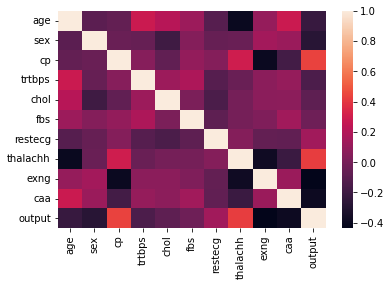

In [8]:
sns.heatmap (df.corr())

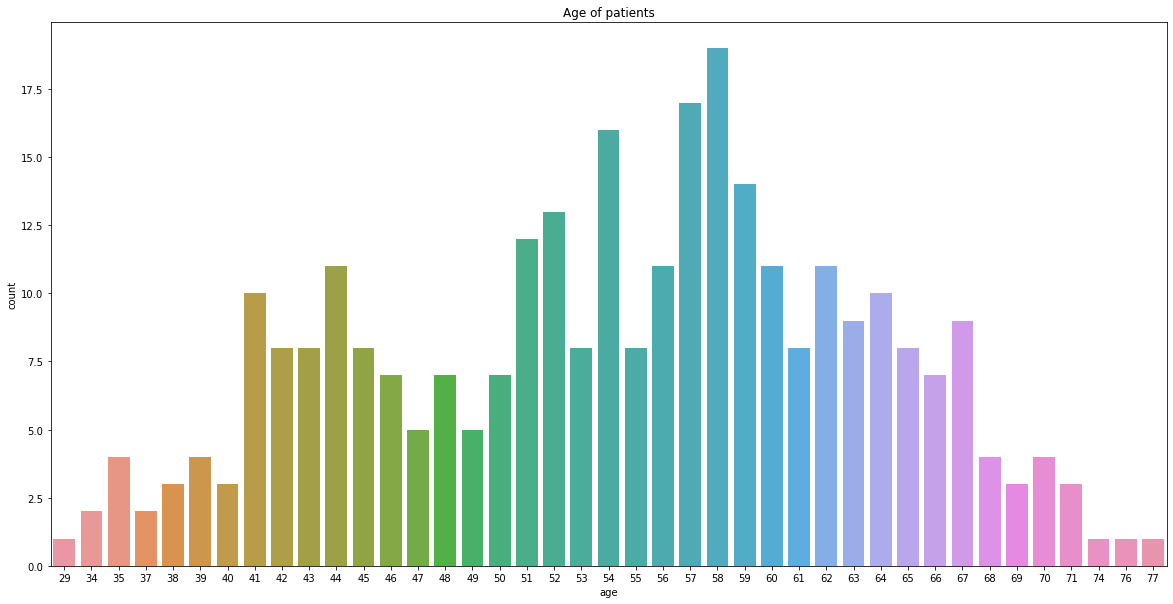

In [9]:
# uni and bi variate analysis 

plt.figure (figsize = (20,10))
plt.title ("Age of patients")
plt.xlabel ("Age")
sns.countplot (x = "age", data = df);

# Most of the patients between 51 to 67

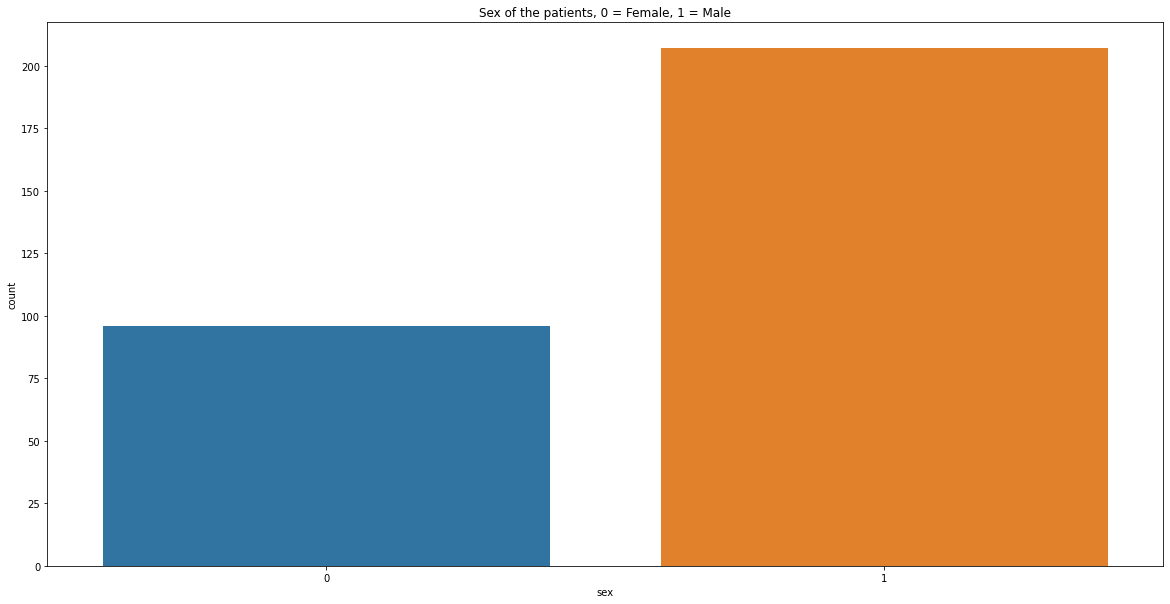

In [10]:
plt.figure (figsize = (20,10))
plt.title ("Sex of the patients, 0 = Female, 1 = Male") 

sns.countplot (x = "sex", data = df);

In [11]:
# Update value in "cp" column
df["cp"] = df["cp"].replace ([0,1,2,3],["Typical angina","Atypical angina","Non-anginal pain","Aysmptomatic"])

cp_data = df.groupby (["cp"])["cp"].size().sort_values(ascending = False).reset_index(name='counts')
cp_data

,cp,counts
0,Typical angina,143
1,Non-anginal pain,87
2,Atypical angina,50
3,Aysmptomatic,23


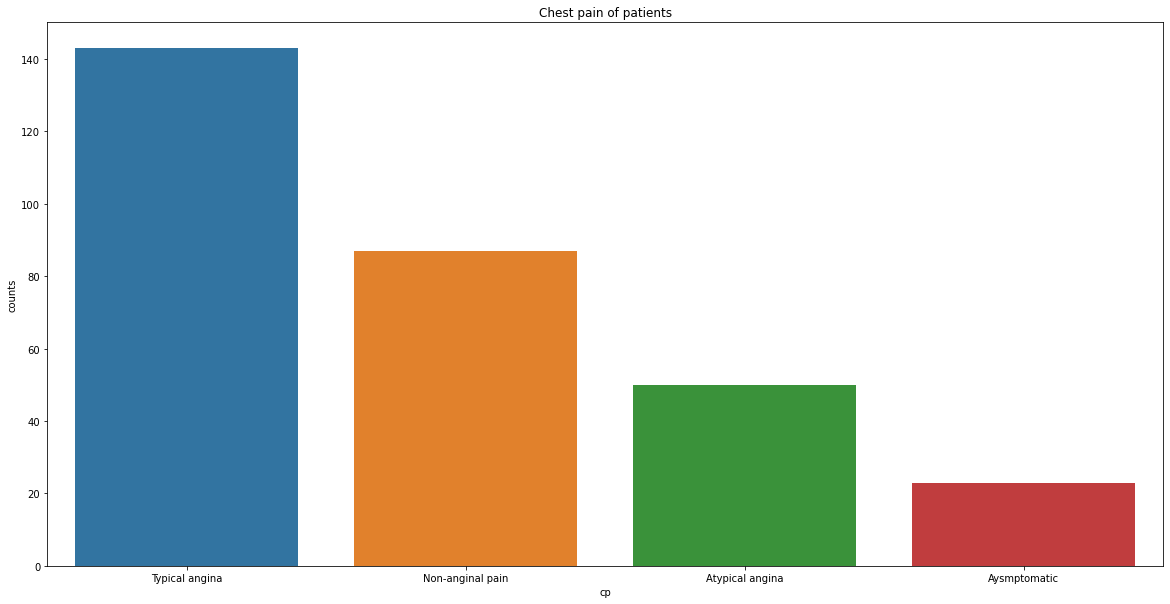

In [12]:
plt.figure (figsize=(20,10))
plt.title ("Chest pain of patients")

sns.barplot (x = cp_data["cp"], y = cp_data["counts"]);

In [14]:
# Update value in "cp" column
df["restecg"] = df["restecg"].replace ([0,1,2],["Normal","ST-T Wave abnormality","Possible or definite left ventricular hypertrophy"])

ecg_data = df.groupby (["restecg"])["restecg"].size().sort_values(ascending = False).reset_index(name='counts')
ecg_data

,restecg,counts
0,ST-T Wave abnormality,152
1,Normal,147
2,Possible or definite left ventricular hypertrophy,4


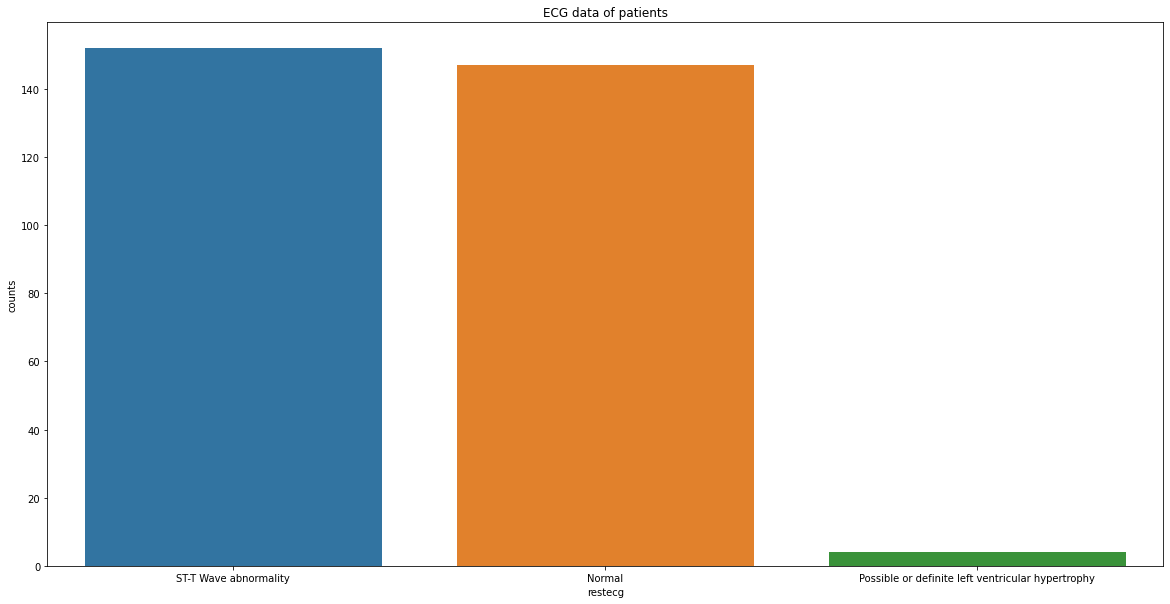

In [16]:
plt.figure (figsize=(20,10))
plt.title ("ECG data of patients")

sns.barplot (x = ecg_data["restecg"], y = ecg_data["counts"]);

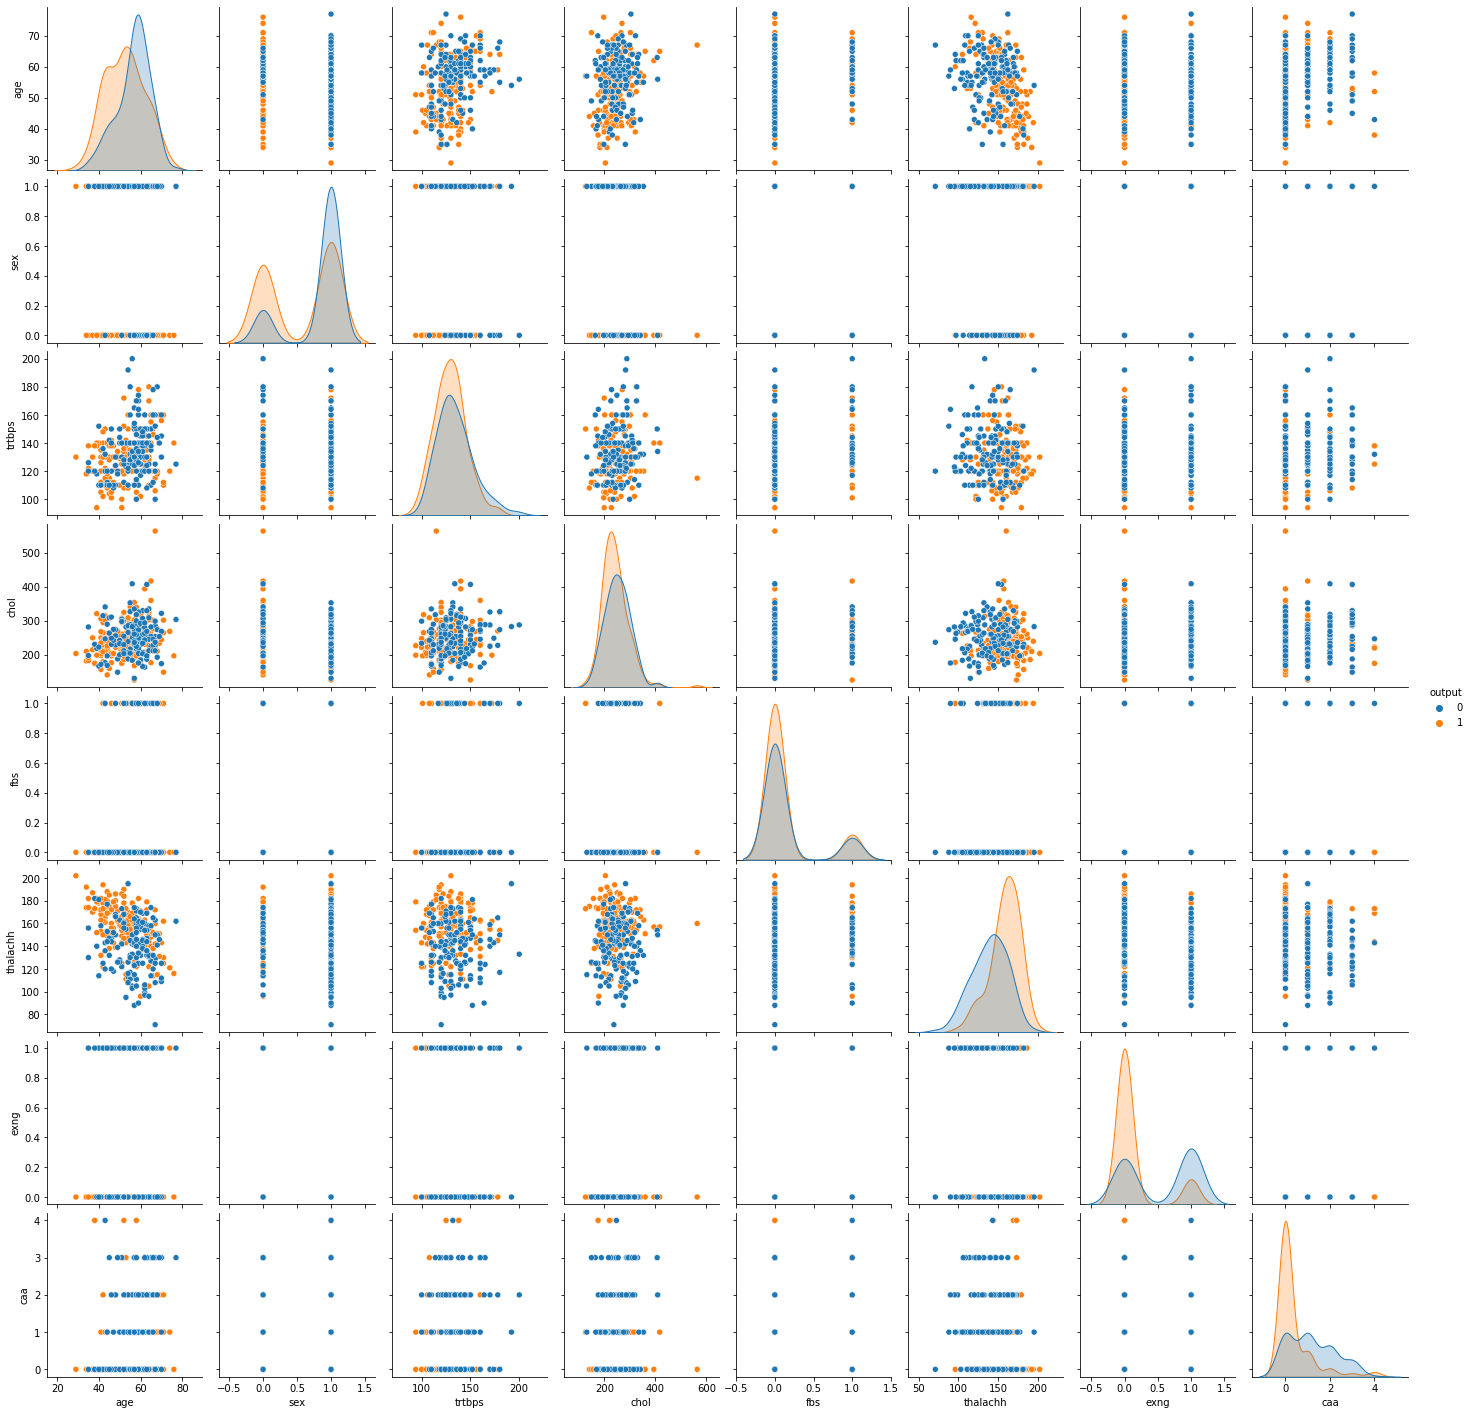

In [18]:
# hue = output, by 0 and 1
# use to look for categorical data

sns.pairplot (df, hue = "output", data = df);

c:\Users\roger\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\roger\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


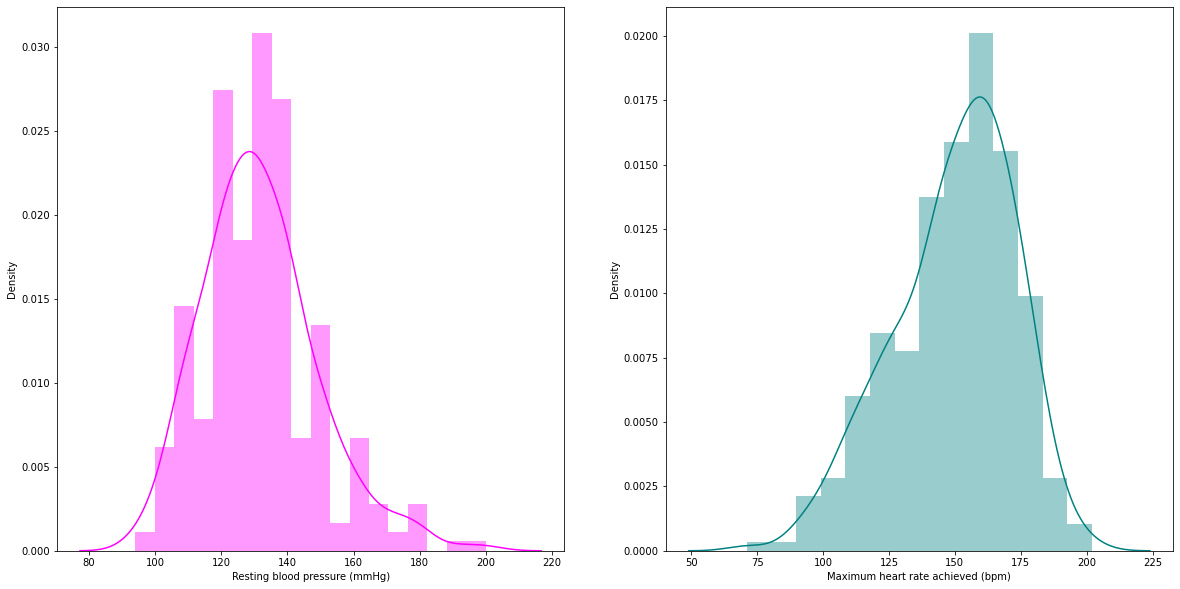

In [22]:
# continuous variables 
plt.figure (figsize=(20,10))
plt.subplot (1,2,1)
sns.distplot(df["trtbps"], kde = True, color = "magenta")
plt.xlabel ("Resting blood pressure (mmHg)")
plt.subplot (1,2,2)
sns.distplot(df["thalachh"], kde = True, color = "teal")
plt.xlabel ("Maximum heart rate achieved (bpm)");

c:\Users\roger\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


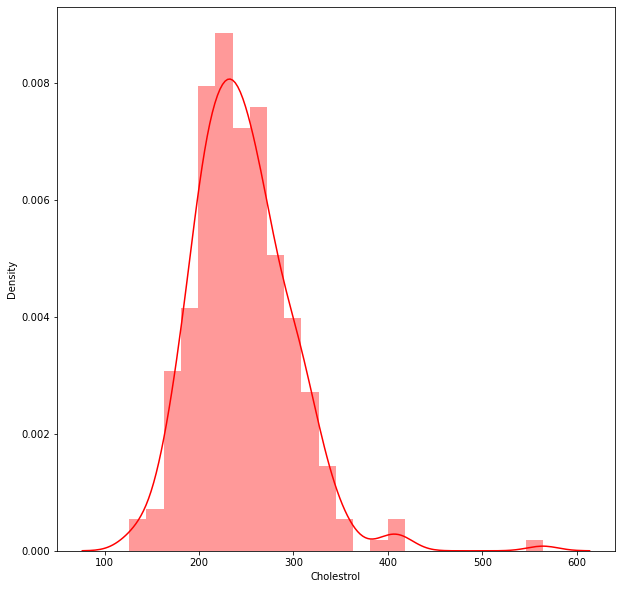

In [24]:
plt.figure (figsize=(10,10))
sns.distplot (df["chol"], kde = True, color = "red")
plt.xlabel ("Cholestrol");